In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Importing the dataset
%%bigquery df --project trans-falcon-383013
SELECT 
  *
FROM `trans-falcon-383013.project.life_expectancy`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,year,sex,hale_years
0,1990,Male,65.3
1,1995,Male,66.5
2,2000,Male,68.6
3,2005,Male,70.3
4,2010,Male,71.7
5,2015,Male,73.0
6,2019,Male,73.7
7,1990,Female,68.2
8,1995,Female,69.5
9,2000,Female,71.1


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#filtered_df = df.loc[(df['facility_type_a'] == "Acute")]
#grouped_df = filtered_df.groupby(['year'])['rate'].sum().reset_index()
grouped_df = df.groupby('year')['hale_years'].sum().reset_index()
print(grouped_df)

   year  hale_years
0  1990       133.5
1  1995       136.0
2  2000       139.7
3  2005       143.1
4  2010       145.5
5  2015       147.7
6  2019       148.9


In [ ]:
# Assuming you have a pandas DataFrame called 'df' containing the data you provided
X = grouped_df[['year']] # Features
y = grouped_df['hale_years'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the number of doctors for a given year
year = [[2023]]
predicted_num_doctors = regressor.predict(year)
print("Predicted number of doctors for 2023:", predicted_num_doctors[0])

Mean Squared Error: 1.4865153055708802
R-squared: 0.9297488040845523
Predicted number of doctors for 2023: 152.95534883720939


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


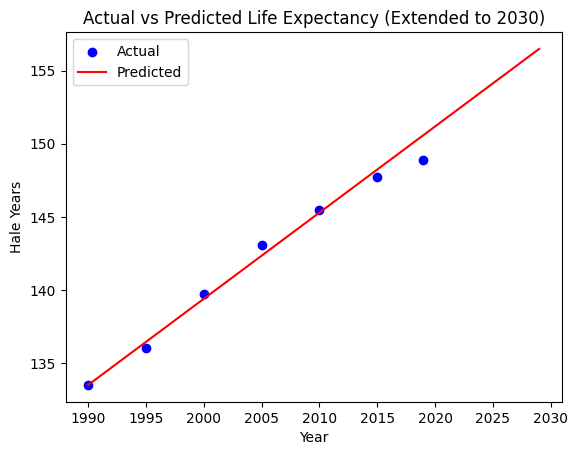

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an extended range of financial years until 2025
extended_years = np.arange(1990, 2030).reshape(-1, 1)

# Predict the government health expenditure for the extended range
y_pred_extended = regressor.predict(extended_years)

# Plot the actual values
plt.scatter(X, y, color='blue', label='Actual')

# Plot the predicted line
plt.plot(extended_years, y_pred_extended, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Hale Years')
plt.legend()
plt.title('Actual vs Predicted Life Expectancy (Extended to 2030)')

# Show the plot
plt.show()